<a href="https://colab.research.google.com/github/ippuirfana/ADULT-INCOME-ANALYSIS/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ADULT INCOME PREDICTION**

# ABOUT DATASET

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.




## Importing Necessart Packages

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

# Listing The Directory Item

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Dataset/adult[1].csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Drop Columns

In [ ]:
df.drop(['native-country','marital-status','relationship'],axis=1,inplace=True)

#since it doesnot contribute to accuraccy

# To Check Missing Values

In [ ]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
occupation         0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
income             0
dtype: int64

# Shape Of The Dataset

In [ ]:
df.shape

(48842, 12)

# To Check The Datatypes

In [ ]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
occupation         object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
income             object
dtype: object

In [ ]:
df

,age,workclass,fnlwgt,education,educational-num,occupation,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,Private,226802,11th,7,Machine-op-inspct,Black,Male,0,0,40,<=50K
1,38,Private,89814,HS-grad,9,Farming-fishing,White,Male,0,0,50,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Protective-serv,White,Male,0,0,40,>50K
3,44,Private,160323,Some-college,10,Machine-op-inspct,Black,Male,7688,0,40,>50K
4,18,?,103497,Some-college,10,?,White,Female,0,0,30,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Tech-support,White,Female,0,0,38,<=50K
48838,40,Private,154374,HS-grad,9,Machine-op-inspct,White,Male,0,0,40,>50K
48839,58,Private,151910,HS-grad,9,Adm-clerical,White,Female,0,0,40,<=50K
48840,22,Private,201490,HS-grad,9,Adm-clerical,White,Male,0,0,20,<=50K


In [ ]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [ ]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [ ]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [ ]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

#Label Encoder

The Adult income prediction project involves the application of label encoding in the preprocessing phase of a machine learning workflow. The primary goal is to convert categorical data into numerical format, facilitating the use of various machine learning algorithms that require numerical input.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['workclass']=le.fit_transform(df['workclass'])
df['education']=le.fit_transform(df['education'])
df['occupation']=le.fit_transform(df['occupation'])
df['race']=le.fit_transform(df['race'])
df['gender']=le.fit_transform(df['gender'])
df['income']=le.fit_transform(df['income'])


In [ ]:
df

,age,workclass,fnlwgt,education,educational-num,occupation,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,4,226802,1,7,7,2,1,0,0,40,0
1,38,4,89814,11,9,5,4,1,0,0,50,0
2,28,2,336951,7,12,11,4,1,0,0,40,1
3,44,4,160323,15,10,7,2,1,7688,0,40,1
4,18,0,103497,15,10,0,4,0,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,7,12,13,4,0,0,0,38,0
48838,40,4,154374,11,9,7,4,1,0,0,40,1
48839,58,4,151910,11,9,1,4,0,0,0,40,0
48840,22,4,201490,11,9,1,4,1,0,0,20,0


# Seprate X and y

In [ ]:
X=df.iloc[:,:-1]
X

,age,workclass,fnlwgt,education,educational-num,occupation,race,gender,capital-gain,capital-loss,hours-per-week
0,25,4,226802,1,7,7,2,1,0,0,40
1,38,4,89814,11,9,5,4,1,0,0,50
2,28,2,336951,7,12,11,4,1,0,0,40
3,44,4,160323,15,10,7,2,1,7688,0,40
4,18,0,103497,15,10,0,4,0,0,0,30
...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,7,12,13,4,0,0,0,38
48838,40,4,154374,11,9,7,4,1,0,0,40
48839,58,4,151910,11,9,1,4,0,0,0,40
48840,22,4,201490,11,9,1,4,1,0,0,20


In [ ]:
y=df.iloc[:,-1]
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

# Scaling

Scaling in machine learning refers to the process of standardizing or normalizing the features of a dataset. The goal of scaling is to ensure that all features have similar scales or ranges. Many machine learning algorithms use some form of distance or gradient descent during their optimization process, and having features on different scales can lead to issues. Scaling helps to mitigate these issues and ensures that the algorithm performs well across all features.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled


array([[0.10958904, 0.5       , 0.14512876, ..., 0.        , 0.        ,
        0.39795918],
       [0.28767123, 0.5       , 0.05245126, ..., 0.        , 0.        ,
        0.5       ],
       [0.15068493, 0.25      , 0.21964867, ..., 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.5       , 0.09446153, ..., 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.5       , 0.12800425, ..., 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.625     , 0.18648211, ..., 0.1502415 , 0.        ,
        0.39795918]])

# Train_Test_Split

In machine learning, the process of splitting a dataset into training and testing sets is a fundamental step for model evaluation and validation. The idea is to train the model on one subset of the data (the training set) and then evaluate its performance on another independent subset (the testing set). This helps assess how well the model generalizes to unseen data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
knn=KNeighborsClassifier()
sv=SVC()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()

# Creating A Machine Learning Model

In [ ]:
lst=[knn,sv,dtc,gnb,rfc,abc]
for i in lst:
  print("*******************",i,"************************")
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print("Accuracy Score = ",accuracy_score(y_test,y_pred)*100)
  print(classification_report(y_test,y_pred))

******************* KNeighborsClassifier() ************************
Accuracy Score =  80.61147887804545
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     11112
           1       0.63      0.49      0.55      3541

    accuracy                           0.81     14653
   macro avg       0.74      0.70      0.71     14653
weighted avg       0.79      0.81      0.80     14653

******************* SVC() ************************
Accuracy Score =  82.55647307718556
              precision    recall  f1-score   support

           0       0.84      0.96      0.89     11112
           1       0.76      0.41      0.53      3541

    accuracy                           0.83     14653
   macro avg       0.80      0.68      0.71     14653
weighted avg       0.82      0.83      0.81     14653

******************* DecisionTreeClassifier() ************************
Accuracy Score =  78.25701221592848
              precision    recall  f1-score   sup

# Perfomance Evaluation

<function matplotlib.pyplot.show(close=None, block=None)>

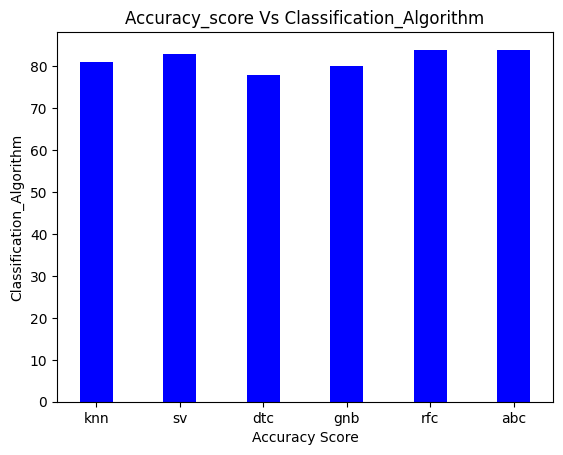

In [ ]:
import matplotlib.pyplot as plt
x1=[81,83,78,80,84,84]
y1=['knn','sv','dtc','gnb','rfc','abc']
plt.xlabel('Accuracy Score')
plt.ylabel('Classification_Algorithm')
plt.title("Accuracy_score Vs Classification_Algorithm")
plt.bar(y1,x1,width=0.4,color='blue')
plt.show


#Over Sampling

Oversampling is a technique used in machine learning to address the issue of class imbalance in a dataset. Class imbalance occurs when the number of instances (samples or observations) in one class is significantly lower than the number of instances in the other class or classes. Oversampling involves increasing the number of instances in the minority class to balance it with the majority class or classes.


In [ ]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(random_state=1)
X_os,y_os=oversample.fit_resample(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
knn_os=KNeighborsClassifier()
sv_os=SVC()
dtc_os=DecisionTreeClassifier()
gnb_os=GaussianNB()
rfc_os=RandomForestClassifier()
abc_os=AdaBoostClassifier()

In [ ]:
lst=[knn_os,sv_os,dtc_os,gnb_os,rfc_os,abc_os]
for i in lst:
  print("*******************",i,"************************")
  i.fit(X_train_os,y_train_os)
  y_pred_os=i.predict(X_test_os)
  print("Accuracy Score = ",accuracy_score(y_test_os,y_pred_os)*100)
  print(classification_report(y_test_os,y_pred_os))

******************* KNeighborsClassifier() ************************
Accuracy Score =  72.65060781411205
              precision    recall  f1-score   support

           0       0.75      0.67      0.71     11114
           1       0.70      0.78      0.74     11179

    accuracy                           0.73     22293
   macro avg       0.73      0.73      0.73     22293
weighted avg       0.73      0.73      0.73     22293

******************* SVC() ************************
Accuracy Score =  59.184497375857894
              precision    recall  f1-score   support

           0       0.55      0.99      0.71     11114
           1       0.94      0.20      0.33     11179

    accuracy                           0.59     22293
   macro avg       0.75      0.59      0.52     22293
weighted avg       0.75      0.59      0.52     22293

******************* DecisionTreeClassifier() ************************
Accuracy Score =  82.12891939173733
              precision    recall  f1-score   su

# Perfomance Evaluation

<function matplotlib.pyplot.show(close=None, block=None)>

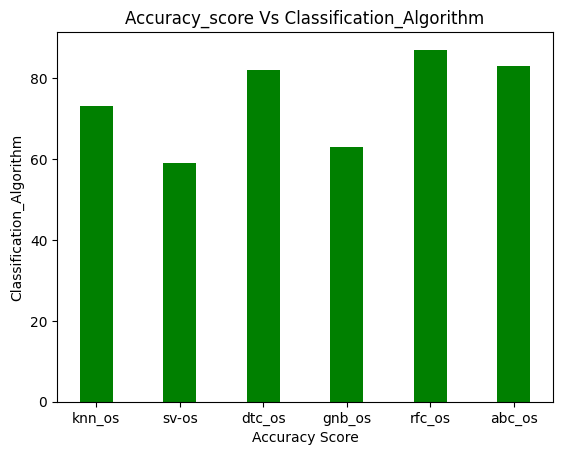

In [ ]:
import matplotlib.pyplot as plt
x1=[73,59,82,63,87,83]
y1=['knn_os','sv-os','dtc_os','gnb_os','rfc_os','abc_os']
plt.xlabel('Accuracy Score')
plt.ylabel('Classification_Algorithm')
plt.title("Accuracy_score Vs Classification_Algorithm")
plt.bar(y1,x1,width=0.4,color='green')
plt.show

# under sampling

Undersampling is a technique used in the field of machine learning to address the issue of class imbalance in a dataset. Class imbalance occurs when the number of instances (samples or observations) in one class is significantly lower than the number of instances in the other class or classes. This imbalance can lead to biased models that may perform poorly on the minority class.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersampler=RandomUnderSampler()
X_us,y_us=undersampler.fit_resample(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_us,X_test_us,y_train_us,y_test_us=train_test_split(X_us,y_us,test_size=0.3,random_state=1)

In [ ]:
knn_us=KNeighborsClassifier()
sv_us=SVC()
dtc_us=DecisionTreeClassifier()
gnb_us=GaussianNB()
rfc_us=RandomForestClassifier()
abc_us=AdaBoostClassifier()

In [ ]:
lst=[knn_us,sv_us,dtc_us,gnb_us,rfc_us,abc_us]
for i in lst:
  print("*******************",i,"************************")
  i.fit(X_train_us,y_train_us)
  y_pred_us=i.predict(X_test_us)
  print("Accuracy Score = ",accuracy_score(y_test_us,y_pred_us)*100)
  print(classification_report(y_test_us,y_pred_us))

******************* KNeighborsClassifier() ************************
Accuracy Score =  60.644517324967914
              precision    recall  f1-score   support

           0       0.61      0.62      0.61      3534
           1       0.61      0.59      0.60      3479

    accuracy                           0.61      7013
   macro avg       0.61      0.61      0.61      7013
weighted avg       0.61      0.61      0.61      7013

******************* SVC() ************************
Accuracy Score =  59.589334093825755
              precision    recall  f1-score   support

           0       0.56      0.99      0.71      3534
           1       0.95      0.20      0.32      3479

    accuracy                           0.60      7013
   macro avg       0.75      0.59      0.52      7013
weighted avg       0.75      0.60      0.52      7013

******************* DecisionTreeClassifier() ************************
Accuracy Score =  71.76671895052046
              precision    recall  f1-score   s

# Perfomance Evaluation

<function matplotlib.pyplot.show(close=None, block=None)>

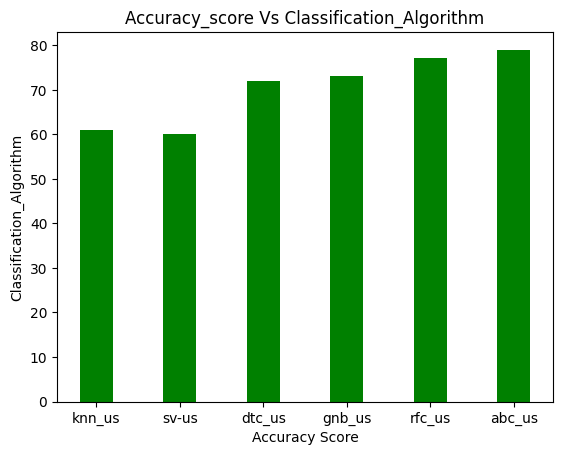

In [ ]:
import matplotlib.pyplot as plt
x1=[61,60,72,73,77,79]
y1=['knn_us','sv-us','dtc_us','gnb_us','rfc_us','abc_us']
plt.xlabel('Accuracy Score')
plt.ylabel('Classification_Algorithm')
plt.title("Accuracy_score Vs Classification_Algorithm")
plt.bar(y1,x1,width=0.4,color='green')
plt.show

# Hyperparameter Tuning

Hyperparameter tuning,also known as hyperparameter optimization,is the process of finding the best set of hyperparameters for a machine learning model to achieve optimal perfomance

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


params={'n_estimators':[50,100,200,300],
        'max_features':['auto','sqrt','log2'],
        'max_depth':[None,10,20,30],
         'min_samples_split':[2,5,10],
        'min_samples_leaf':[1,2,4]}

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
random_search=RandomizedSearchCV(estimator=rfc, param_distributions=params, n_iter=5, cv=5, n_jobs=1, random_state=1)

#Fit the random search model1
random_search.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5, n_jobs=1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=1)

In [ ]:
print(random_search.best_params_)    #Taking the best Paramrters

{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20}


In [ ]:
tuned_rf_classifier=RandomForestClassifier()
tuned_rf_classifier.fit(X_train,y_train)
y_pred_new=tuned_rf_classifier.predict(X_test)
y_pred_new

array([0, 0, 0, ..., 0, 0, 0])

# Best Perfoming *Model*




In [ ]:
rfc_os=RandomForestClassifier()
rfc_os.fit(X_train_os,y_train_os)
y_pred_os=rfc_os.predict(X_test_os)
print("Accuracy_Sore = ",accuracy_score(y_test_os,y_pred_os)*100)
print(classification_report(y_test_os,y_pred_os))

Accuracy_Sore =  87.03180370519894
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     11114
           1       0.88      0.85      0.87     11179

    accuracy                           0.87     22293
   macro avg       0.87      0.87      0.87     22293
weighted avg       0.87      0.87      0.87     22293



In [ ]:
y_new=rfc_os.predict(scaler.transform([[25,4,226802,1,7,7,2,1,0,0,40]]))
if y_new==0:
  print("Less than 50k")
else:
  print("Greater than 50k")

Less than 50k


# Conclusion

From above the observation it is noted that randomforest classifier with oversampling have maximum accuraccy,precision,f1_score and recall,while doing under sampling and hyperparameter tunning there is no improvement in above mentioned perfomance parameters

In [ ]:
import joblib



In [42]:
from joblib import dump

# Assume 'model' is the trained model you want to save
# Replace 'model' with the variable name of your actual model

# Save your model as a .joblib file
dump(rfc_os, 'adultmodel.joblib')

# To download the file to your local machine from Google Colab
from google.colab import files
files.download('adultmodel.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>